In [1]:
from shinka.utils import load_programs_to_df

path = "results/results_circle_async_small/"
programs_df, prompts_df = load_programs_to_df(path, include_prompts=True)

Total program rows: 34
Correct program rows: 23
Total cost: $0.56
Avg cost per program: $0.02
Total prompt rows: 7
Prompts in archive: 7


In [3]:
programs_df.head()

,id,code,language,parent_id,archive_inspiration_ids,top_k_inspiration_ids,generation,timestamp,complexity,embedding,...,meta_summary,meta_scratch_pad,novelty_checks_performed,novelty_explanation,_spawned_island,_spawned_from_program_id,_spawn_island_idx,_spawn_strategy,_spawned_as_child,total_cost
0,57a1eb08-328e-443b-88ef-840fbb7bdff0,"# EVOLVE-BLOCK-START\n""""""Constructor-based cir...",python,None,[],[],0,2026-02-16 13:47:54.830883026,0.986,"[0.019342523, -0.024178155, 0.06554044, -0.018...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000017
1,c6fc408e-1d6b-4925-93b5-4140140851ea,"# EVOLVE-BLOCK-START\n""""""Constructor-based cir...",python,57a1eb08-328e-443b-88ef-840fbb7bdff0,[],[],1,2026-02-16 13:49:37.176345110,1.000,"[0.007500167, -0.023122687, 0.08031853, -0.036...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004465
2,01198292-fd45-4fa1-a9a1-a19760624e98,"# EVOLVE-BLOCK-START\n""""""Constructor-based cir...",python,57a1eb08-328e-443b-88ef-840fbb7bdff0,[],[],2,2026-02-16 13:50:21.916233063,0.935,"[0.016691044, -0.030802157, 0.061514575, -0.01...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007013
3,c1e8dae7-72e5-4315-a441-696d79b7dd0c,"# EVOLVE-BLOCK-START\n""""""Hybrid multi-start + ...",python,01198292-fd45-4fa1-a9a1-a19760624e98,"[c6fc408e-1d6b-4925-93b5-4140140851ea, 57a1eb0...",[],4,2026-02-16 13:51:06.692347050,1.000,"[0.0025871422, -0.0059762374, 0.09655387, -0.0...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010044
4,c26696f3-0215-4fe4-83ff-378e40f2d452,"# EVOLVE-BLOCK-START\n""""""Constructor-based cir...",python,01198292-fd45-4fa1-a9a1-a19760624e98,"[c6fc408e-1d6b-4925-93b5-4140140851ea, 57a1eb0...",[],5,2026-02-16 13:52:55.217642069,1.000,"[0.019430252, -0.033073742, 0.06445491, -0.026...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028057


Filtered to 23 'correct' rows from 34 total.


/Users/rob/Dropbox/2025_sakana/code/shinka/shinka/plots/plot_lineage_tree.py:384: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(
/Users/rob/Dropbox/2025_sakana/code/shinka/shinka/plots/plot_lineage_tree.py:398: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(
/Users/rob/anaconda3/envs/scevo/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: You passed a edgecolor/edgecolors ('darkred') for an unfilled marker (np.str_('x')).  Matplotlib is ignoring t

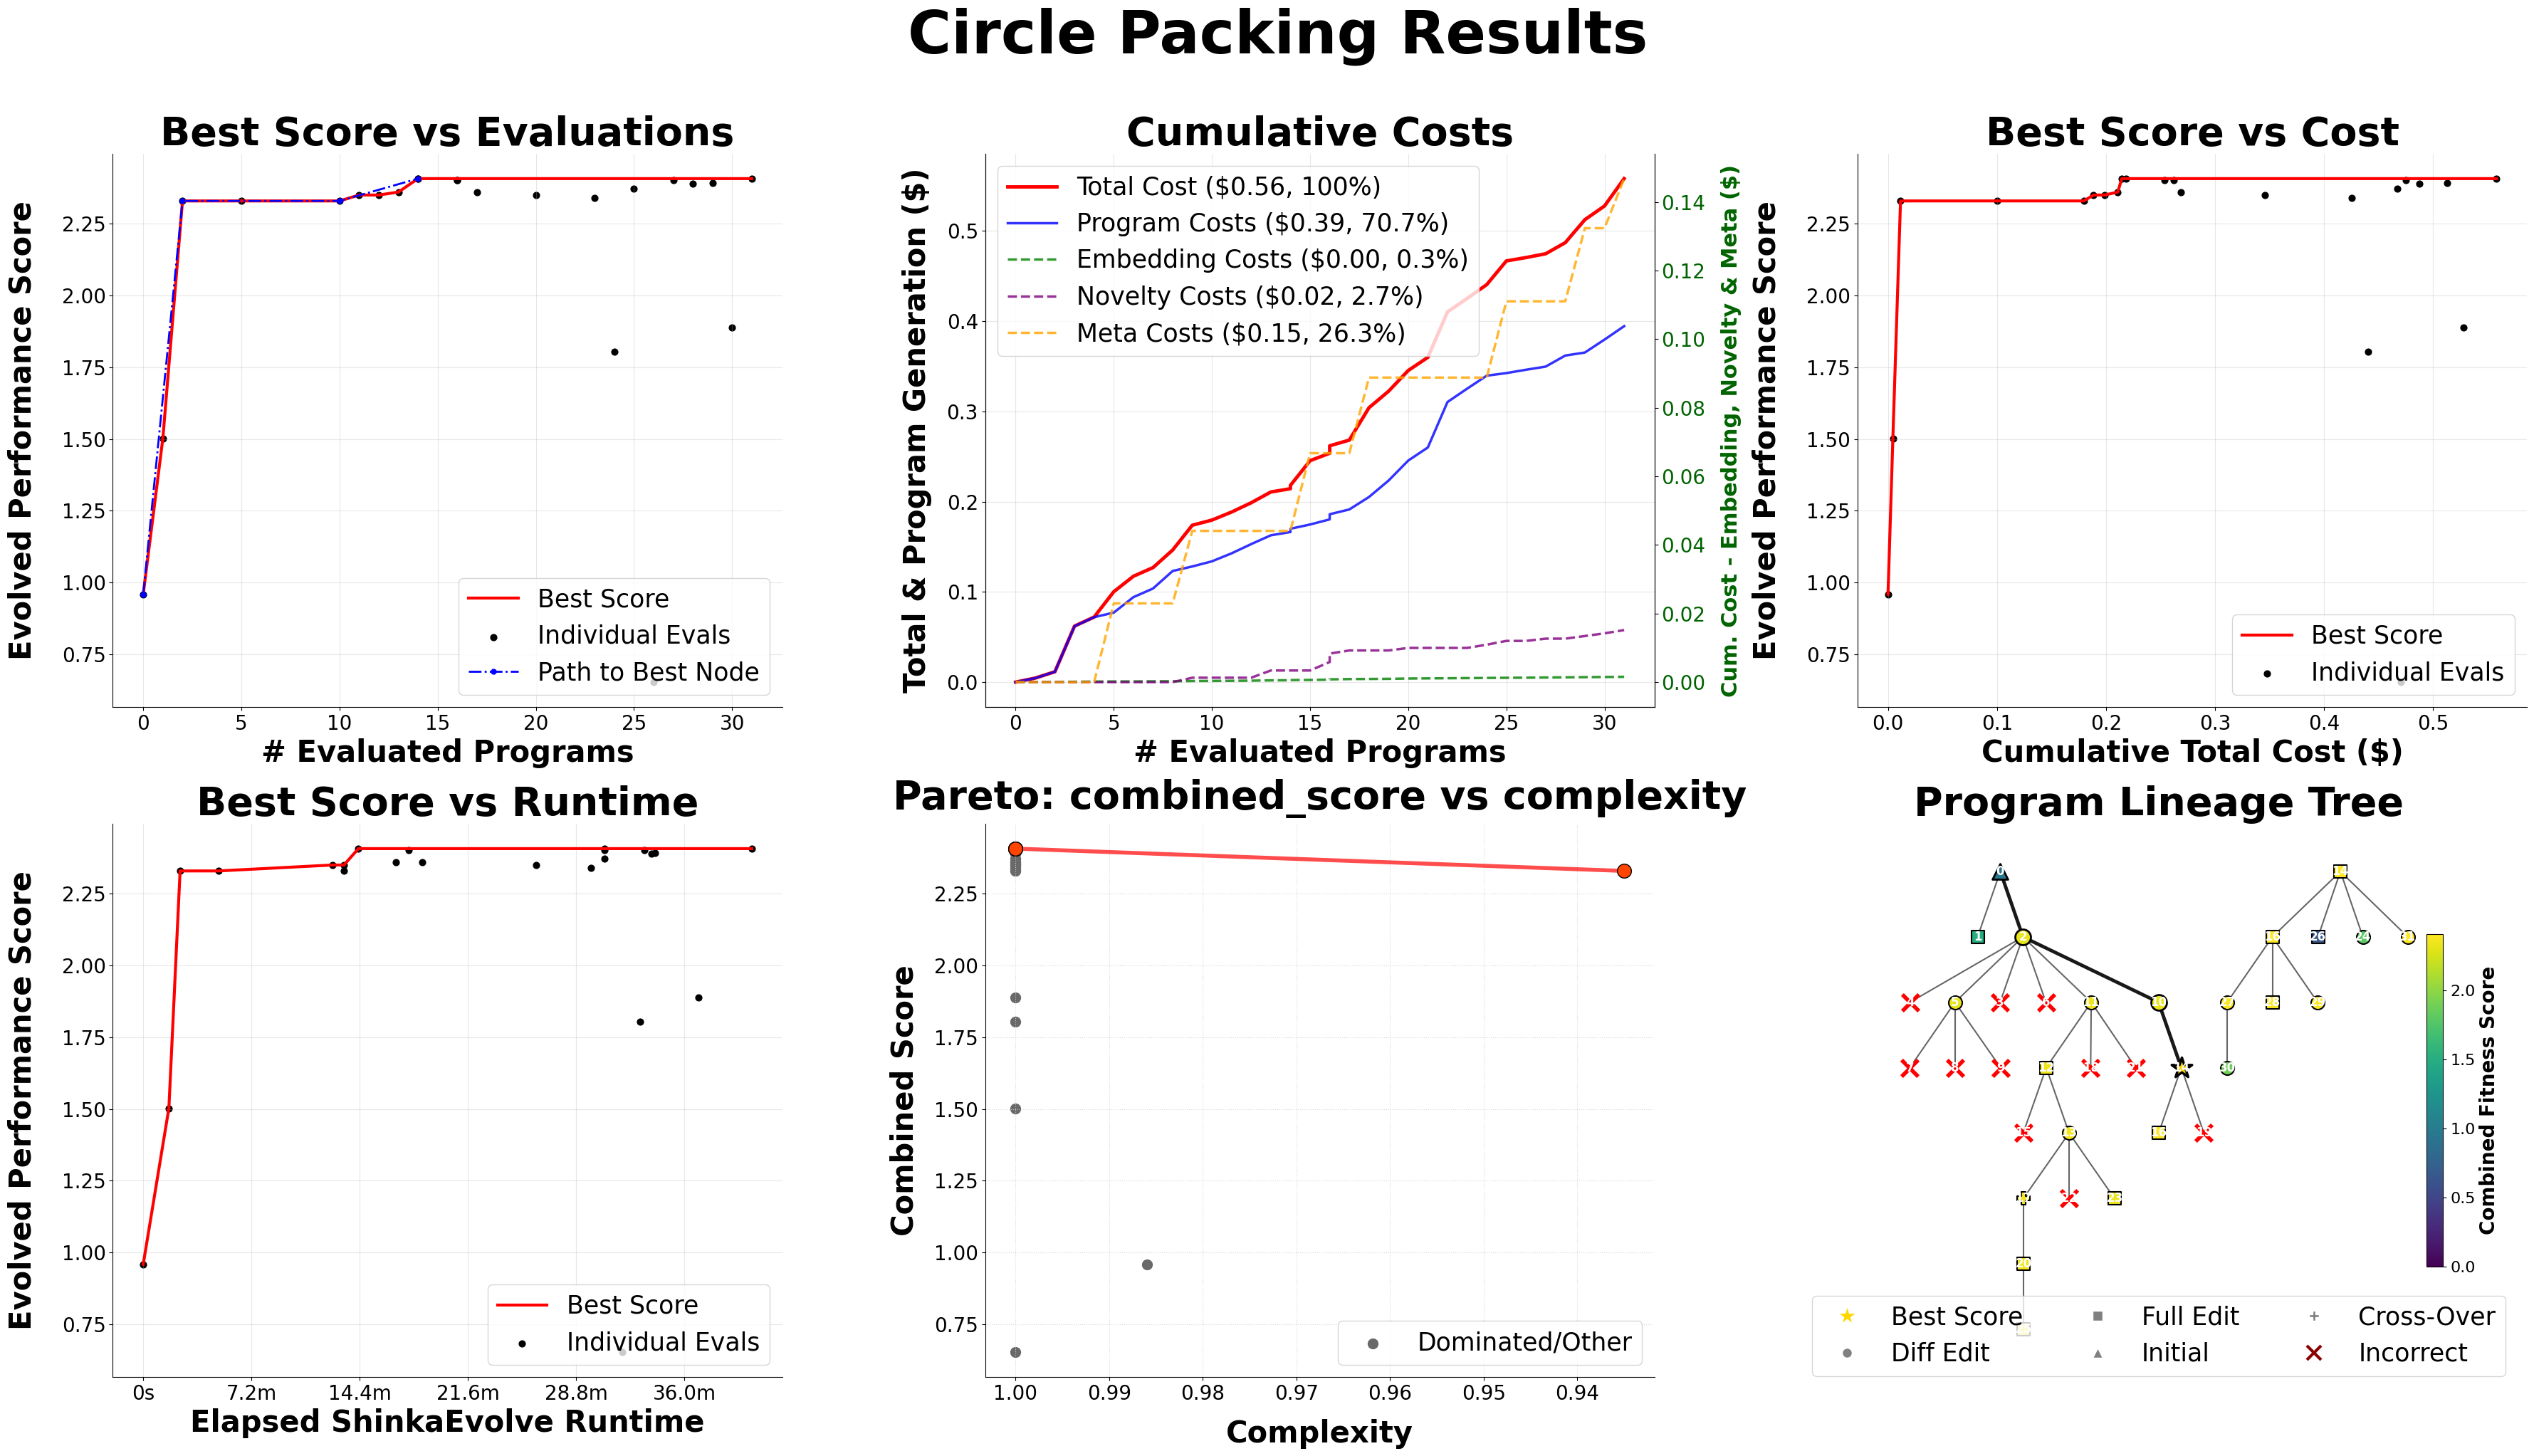

In [ ]:
import matplotlib.pyplot as plt

from shinka.plots import plot_evals_performance
from shinka.plots import plot_costs
from shinka.plots import plot_cost_performance
from shinka.plots import plot_time_performance
from shinka.plots import plot_pareto_curve
from shinka.plots import plot_lineage_tree

if programs_df is None or programs_df.empty:
    raise ValueError(
        "No program data loaded. Update `path` in cell 0 to a valid results directory."
    )

fig, axs = plt.subplots(2, 3, figsize=(36, 20))
fig.suptitle("Circle Packing Results", fontsize=60, weight="bold", y=1.02)

plot_evals_performance(
    programs_df,
    title="Best Score vs Evaluations",
    fig=fig,
    ax=axs[0, 0],
    annotate=False,
    show_cost=False,
)

plot_costs(
    programs_df,
    title="Cumulative Costs",
    fig=fig,
    ax=axs[0, 1],
)

plot_cost_performance(
    programs_df,
    title="Best Score vs Cost",
    fig=fig,
    ax=axs[0, 2],
)

plot_time_performance(
    programs_df,
    title="Best Score vs Runtime",
    fig=fig,
    ax=axs[1, 0],
)

# Pick a Pareto pair that usually exists in Shinka results.
if "loc" in programs_df.columns:
    pareto_x, pareto_y = "loc", "combined_score"
    x_maximize, y_maximize = False, True
elif "complexity" in programs_df.columns:
    pareto_x, pareto_y = "complexity", "combined_score"
    x_maximize, y_maximize = False, True
elif "total_cost" in programs_df.columns:
    pareto_x, pareto_y = "total_cost", "combined_score"
    x_maximize, y_maximize = False, True
else:
    pareto_x, pareto_y = "generation", "combined_score"
    x_maximize, y_maximize = True, True

plot_pareto_curve(
    programs_df,
    x_variable=pareto_x,
    y_variable=pareto_y,
    x_maximize=x_maximize,
    y_maximize=y_maximize,
    title=f"Pareto: {pareto_y} vs {pareto_x}",
    fig=fig,
    ax=axs[1, 1],
    annotate=False,
)

plot_lineage_tree(
    programs_df,
    title="Program Lineage Tree",
    fig=fig,
    ax=axs[1, 2],
)

plt.tight_layout()
plt.show()
